# DDW TASK 2

## Contribution
- Jia Hui - Brainstormed on features, researching, model experimenting
- Pei Xuan - Brainstormed on features, researching, data cleaning
- Min Khant - Brainstormed on features, researching

## Problem Statement

We aim to predict the number of ICU admissions using:

1. Number of days from the introduction of Delta variant
2. Measurement of visitors to transit areas

## Link to Data Sources
### 
*Number of ICU Admissions in United Kingdom*
- [ICU Admissions](https://coronavirus.data.gov.uk/details/healthcare)

*Change in Visitors to Transit Areas*
- [Measurement of visitors](https://ourworldindata.org/grapher/changes-visitors-covid?country=~GBR)

## Cleaning of Data
*Took data from 1/6/2021 to 8/11/2021*

## All possible models
1. **[Linear Regression](#linear)**
2. **[Polynomial Regression](#poly)**
1. **[Mutiple Regression](#multi)**

## Required Imports

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Functions

In [57]:
def normalize_z(df):
    # mean with axis 0 is summing the rows
    return (df - df.mean(axis=0)) / df.std(axis=0) 

def get_features_targets(df, feature_names, target_names):
    df_feature = df[feature_names]
    df_target = df[target_names]
    return df_feature, df_target

def prepare_feature(df_feature):
    cols = len(df_feature.columns) 
    feature = df_feature.to_numpy()
    number_of_samples = feature.shape[0]
    return np.concatenate((np.ones((number_of_samples,1)), feature), axis=1)

def prepare_target(df_target):
    # to_numpy() removes the first column (header column)
    return df_target.to_numpy()

def predict(df_feature, beta):
    X = prepare_feature(normalize_z(df_feature))
    return predict_norm(X, beta)

def predict_norm(X, beta):
    return np.matmul(X,beta)

def split_data(df_feature, df_target, random_state=100, test_size=0.3):
    # get the indexes of the feature 
    indexes = df_feature.index
    # seed the random value 
    if random_state != None:
        np.random.seed(random_state)
    # get the number of test samples to extract 
    k = int(test_size * len(indexes))
    # get the indexes from the features and target to select as test set 
    test_index = np.random.choice(indexes, k, replace=False)
    indexes = set(indexes)
    test_index = set(test_index)
    train_index = indexes - test_index
    df_feature_train = df_feature.loc[train_index, :]
    df_feature_test = df_feature.loc[test_index, :]
    df_target_train = df_target.loc[train_index, :]
    df_target_test = df_target.loc[test_index, :]
    return df_feature_train, df_feature_test, df_target_train, df_target_test
  
  
def r2_score(y, ypred):
    sum_res = np.sum((y - ypred)**2)
    error_tot = y - np.mean(y)
    sum_tot = np.sum(error_tot**2)
    return 1-(sum_res/sum_tot)

def adjusted_r2_score(y, ypred, p):
    r2 = r2_score(y, ypred)
    N = y.shape[0]
    return 1-((1-r2)*(N-1)/(N-p-1))

def mean_squared_error(target, pred):
    n = target.shape[0]
    return 1/n * np.sum((target-pred)**2)

def compute_cost(X, y, beta):
    J = 0
    no_of_samples = X.shape[0]
    error = np.matmul(X, beta) - y
    error_sq = np.matmul(error.T, error) # .T is transpose
    J = 1/(2*no_of_samples) * error_sq
    return J[0][0]

def gradient_descent(X, y, beta, alpha, num_iters):
    number_of_samples = X.shape[0]
    J_storage = []
    for i in range(num_iters):
        # STEP 2: compute the derivate with current parameters
        derivative_error = (1/(number_of_samples)) * np.matmul(X.T, (np.matmul(X, beta) - y))
        # STEP 3: update the parameters
        beta = beta - alpha *  derivative_error
        # compute cost at every iteration of beta
        J_storage.append(compute_cost(X, y, beta))
    return beta, J_storage

def transform_features_power(df_feature, colname, colname_transformed, value):
    df_feature[colname_transformed] = df_feature[colname]**value
    return df_feature

def add_feature(df_feature, colname_transformed, value):
    df_feature[colname_transformed] = value
    return df_feature

## Reading data from CSV

Text(0, 0.5, 'Transit')

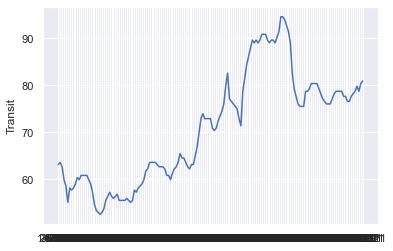

In [58]:
import matplotlib.dates as mdates
df = pd.read_csv("DDW_dataset1.csv")


plt.plot(df['Date'], df["Transit"])
plt.ylabel("Transit")


Text(0, 0.5, 'ICU admissions')

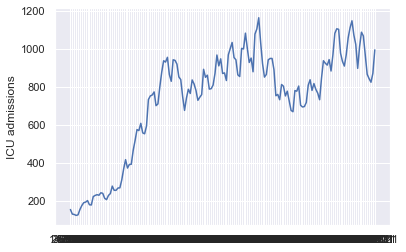

In [59]:
plt.plot(df['Date'], df["ICU admissions"])
plt.ylabel("ICU admissions")

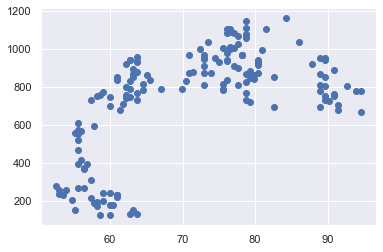

In [60]:
df_feature, df_target = get_features_targets(df,["Transit"],["ICU admissions"])
plt.scatter(df_feature, df_target)

## Linear Regression
<a id="linear"></a>

[[736.00864078]
 [167.81434843]]


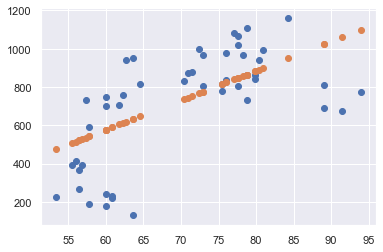

In [61]:
# split data using random_state = 100 and 30% test size
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_feature, df_target)

# normalize features
df_features_train_z = normalize_z(df_features_train)

# change to numpy array and append column for feature
X = prepare_feature(df_features_train_z)
target = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((2,1))

# call gradient_descent() function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

print(beta)
pred = predict(df_features_test, beta)
# print(pred)

sns.set()
plt.scatter(df_features_test["Transit"], df_target_test)
plt.scatter(df_features_test["Transit"], pred)

Text(0, 0.5, 'Cost')

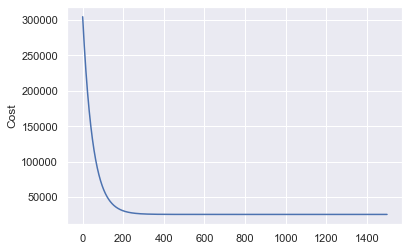

In [62]:
plt.plot(J_storage)
plt.ylabel("Cost")

In [63]:
# TESTS
target = prepare_target(df_target_test)
r2 = r2_score(target, pred)
print(r2, "r2")

a_r2 = adjusted_r2_score(target, pred, 2)
print(a_r2, "Adjusted")

mse = mean_squared_error(target, pred)
print(mse, "mean squared error")


0.40817104527234993 r2
0.38186753617334324 Adjusted
48067.15145843018 mean squared error


## Polynomial Linear Regression
<a id="poly"></a>

       Transit    Transit^2      Transit^3     Transit^4     Transit^5  \
0    63.167292  3990.106829  252044.244784  1.592095e+07  1.005683e+09   
1    63.634273  4049.320760  257675.584613  1.639700e+07  1.043411e+09   
2    62.702460  3931.598540  246520.901776  1.545747e+07  9.692212e+08   
3    59.960674  3595.282403  215575.555358  1.292606e+07  7.750550e+08   
4    58.615639  3435.793079  201391.205154  1.180467e+07  6.919385e+08   
..         ...          ...            ...           ...           ...   
156  78.738140  6199.694708  488152.430556  3.843621e+07  3.026396e+09   
157  79.827316  6372.400335  508691.613441  4.060749e+07  3.241587e+09   
158  78.738140  6199.694708  488152.430556  3.843621e+07  3.026396e+09   
159  80.378272  6460.666566  519297.212823  4.174021e+07  3.355006e+09   
160  80.932250  6550.029035  530108.585143  4.290288e+07  3.472227e+09   

        Transit^6  
0    6.352630e+10  
1    6.639671e+10  
2    6.077256e+10  
3    4.647282e+10  
4    4.0558

C:\Users\jiahu\AppData\Local\Temp/ipykernel_17236/3703272740.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature[colname_transformed] = df_feature[colname]**value


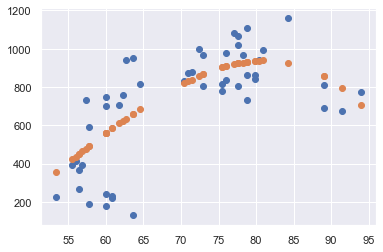

In [64]:
df_features_second = transform_features_power(df_feature, 'Transit', 'Transit^2', 2)
df_features_second = transform_features_power(df_feature, 'Transit', 'Transit^3', 3)
df_features_second = transform_features_power(df_feature, 'Transit', 'Transit^4', 4)
df_features_second = transform_features_power(df_feature, 'Transit', 'Transit^5', 5)
df_features_second = transform_features_power(df_feature, 'Transit', 'Transit^6', 6)

print(df_features_second)

df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features_second, df_target)

# normalize features
df_features_train_z = normalize_z(df_features_train)

# change to numpy array and append column for feature
X = prepare_feature(df_features_train_z)
target = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((7,1))

# call gradient_descent() function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

print(beta)
pred = predict(df_features_test, beta)
# print(pred)

sns.set()
plt.scatter(df_features_test["Transit"], df_target_test)
plt.scatter(df_features_test["Transit"], pred)


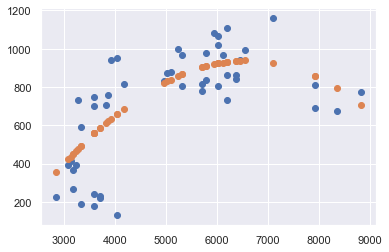

In [65]:
plt.scatter(df_features_test["Transit^2"], df_target_test)
plt.scatter(df_features_test["Transit^2"], pred)

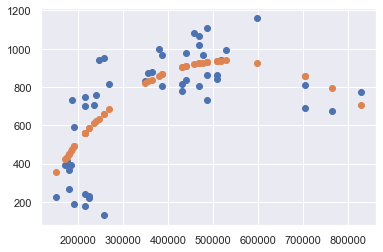

In [66]:
plt.scatter(df_features_test["Transit^3"], df_target_test)
plt.scatter(df_features_test["Transit^3"], pred)

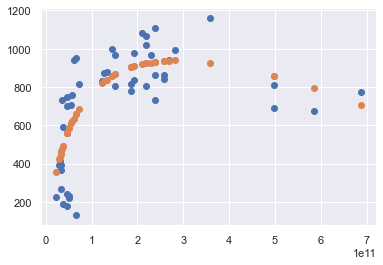

In [67]:
plt.scatter(df_features_test["Transit^6"], df_target_test)
plt.scatter(df_features_test["Transit^6"], pred)

Text(0, 0.5, 'Cost')

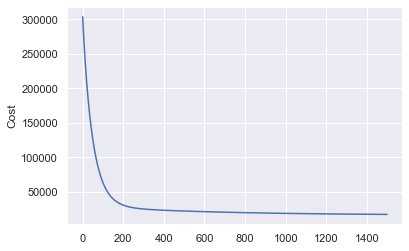

In [68]:
plt.plot(J_storage)
plt.ylabel("Cost")

In [69]:
# TESTS
target = prepare_target(df_target_test)

mse = mean_squared_error(target, pred)
print(mse, "mean squared error")

33944.679013610315 mean squared error


## Multiple Linear Regression
<a id="multi"></a>

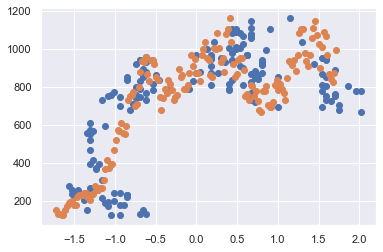

In [70]:
df_features, df_target = get_features_targets(df,["Transit", "Delta"],["ICU admissions"])

df_features = normalize_z(df_features)

plt.scatter(df_features["Transit"], df_target)
plt.scatter(df_features["Delta"], df_target)


[[736.00864078]
 [-22.1222036 ]
 [234.85040057]]


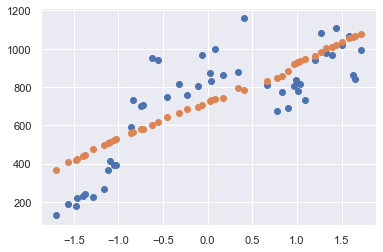

In [71]:
df_features_third = df_features

df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features_third, df_target)

# normalize features
df_features_train_z = normalize_z(df_features_train)

# change to numpy array and append column for feature
X = prepare_feature(df_features_train_z)
target = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((3,1))

# call gradient_descent() function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

print(beta)
pred = predict(df_features_test, beta)
# print(pred)

plt.scatter(df_features_test["Delta"], df_target_test)
plt.scatter(df_features_test["Delta"], pred)

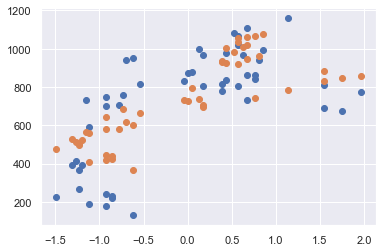

In [72]:
plt.scatter(df_features_test["Transit"], df_target_test)
plt.scatter(df_features_test["Transit"], pred)

In [73]:
# TESTS
target = prepare_target(df_target_test)

mse = mean_squared_error(target, pred)
print(mse, "mean squared error")

29831.817932920894 mean squared error


## Model Evaluation

Steps taken to improve accuracy of model
1. Logging features
2. Adjusting the power of polynomial linear regression model
3. Research for other possible features

